Notes for SQL 

- Create a connection (connect)
- create a cursor with connection object that allows you to bounce around

with pandas
- read_sql; allows you to read sql as a table
- read in as a string the sql command
- now the data is in a pandas table

use sql lite 


In [2]:
#import a bunch of stuff
import arcpy
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patheffects as path_effects
import sqlite3
from scipy import misc
import jinja2

import matplotlib.gridspec as gridspec


In [3]:
conn = sqlite3.connect('../data/test.db') ##connect to database

In [4]:
with conn:
    #create cursor to navigate
    c= conn.cursor()
    #read in content
    site_scale_score = pd.read_sql('SELECT * FROM site_scale_scores', conn)

In [5]:
site_scale_score
#Map_unit_id is a unique identifier
#merge to merge things together
site_scale_score.drop(site_scale_score.tail(1).index,inplace=True)

In [6]:
site_scale_score['map_unit_id'].count()

31

In [7]:
stats = {'Stats':['Total Acres', 'Number of Map Units', 'Functional Breeding Acres', 'Func Late Brooding Acres', 'Fuc Winter Acres'],
         'Number':[site_scale_score['w_facres'].sum(),
                   site_scale_score['map_unit_id'].count(),
                   site_scale_score['b_facres'].sum(),
                   site_scale_score['l_facres'].sum(),
                   site_scale_score['w_facres'].sum()]}

In [8]:
df = pd.DataFrame(stats)
df = df.round(2)
print(df)


                       Stats   Number
0                Total Acres  2367.37
1        Number of Map Units    31.00
2  Functional Breeding Acres  1772.22
3   Func Late Brooding Acres  2130.95
4           Fuc Winter Acres  2367.37


In [9]:
styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "120%"),
    ("color", 'black')])]  

In [18]:
df.style.hide_index().set_caption('General Project Statistics').set_properties(**{'background-color': 'lightgray',
                           'color': 'black'})

## ugh pandas formatting is so much better than matplotlib! for tables at least

Stats,Number
Total Acres,2367.37
Number of Map Units,31
Functional Breeding Acres,1772.22
Func Late Brooding Acres,2130.95
Fuc Winter Acres,2367.37


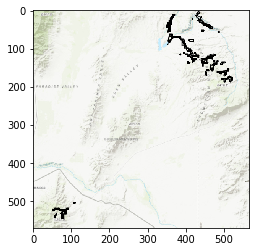

In [11]:
##read in map image 
## this will need to be modified using arcpy.mapping to get full map

img= plt.imread('../data/site_map.png')
plt.imshow(img)

In [12]:
##create summary info table

projinfo =  pd.DataFrame([['Owner', 'George Smith'],
                          ['Date Submitted to CCS', '1 March 2020'],
                          ['Date Analyzed', '5 March 2020'],
                         ['Date of Field Visit', 'TBD'],
                         ['Credit Verifier', 'Kristen Boysen']],
                   columns = ['Info', 'Date'])
projinfo

,Info,Date
0,Owner,George Smith
1,Date Submitted to CCS,1 March 2020
2,Date Analyzed,5 March 2020
3,Date of Field Visit,TBD
4,Credit Verifier,Kristen Boysen


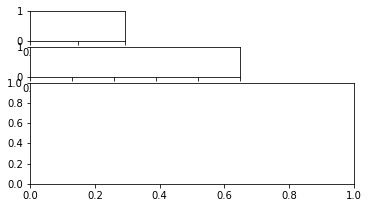

In [18]:
###grid spec outline just to make sure it looks right

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(5, 3, 
              bottom=0.2,
              left=0.15,
              top=0.8)
ax = fig.add_subplot(gs[0,0])

ax3 = fig.add_subplot(gs[1,:-1])

ax7 = fig.add_subplot(gs[2:,0:])

plt.show()

C:\Users\KristenBoysen\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone4\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


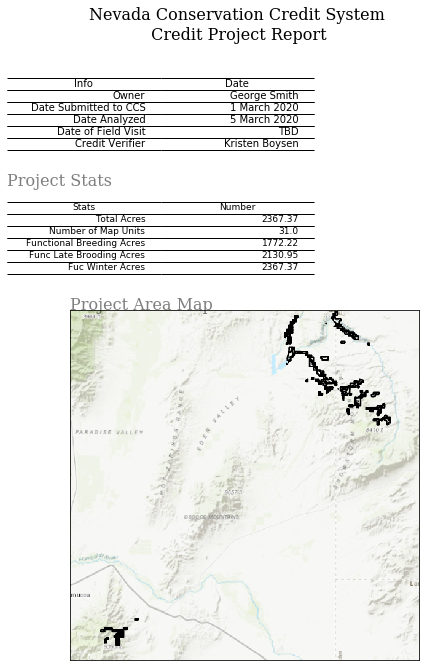

In [17]:
##create multi-plot page using gridspec
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8.5,11))
G = gridspec.GridSpec(5, 3)

axes_1 = plt.subplot(G[0,:-1],frame_on=False)
axes_1.table(cellText=projinfo.values, 
             colLabels= projinfo.columns,
             loc= 'center', 
             edges = 'horizontal', 
             fontsize = 12)
axes_1.xaxis.set_visible(False)
axes_1.yaxis.set_visible(False)

fig.text(0.5,.95,'Nevada Conservation Credit System\n Credit Project Report',
            ha='center',
            va='top',
            size=16,
            family= 'serif')

#ax1.yaxis.set_visible(False)
#ax1.xaxis.set_visible(False)
#ax1.table(cellText=df.values, colLabels= df.columns)


axes_3 = plt.subplot(G[1, :-1], frame_on= False)
#axes_3.set_xticks(())
#axes_3.set_yticks(())
axes_3.yaxis.set_visible(False)
axes_3.xaxis.set_visible(False)
axes_3.text(0, 1, 'Project Stats', 
            #ha='center', va='top', 
            size=16, alpha=.5 ,family= 'serif')
axes_3.table(cellText=df.values, colLabels= df.columns, loc= 'center', edges = 'horizontal')

axes_2 = plt.subplot(G[2:,0:], frame_on= True)
axes_2.set_xticks(())
axes_2.set_yticks(())
axes_2.text(0,0,'Project Area Map', 
            #ha='center', va='top', 
            size=16, alpha=.5, family= 'serif')
axes_2.imshow(img)


fig.show()
pag1 = fig.savefig("..\outputs\output_cover.pdf", dpi=None, facecolor='w', edgecolor='k',
        orientation='portrait', papertype='letter', format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
#plt.savefig("output_all.pdf", dpi=None, facecolor='w', edgecolor='w',
   #     orientation='portrait', papertype=None, format=None,
    #    transparent=False, bbox_inches=None, pad_inches=0.1,
     #   frameon=None, metadata=None)

## now we do the 8.5 x 11 pdf with graphs

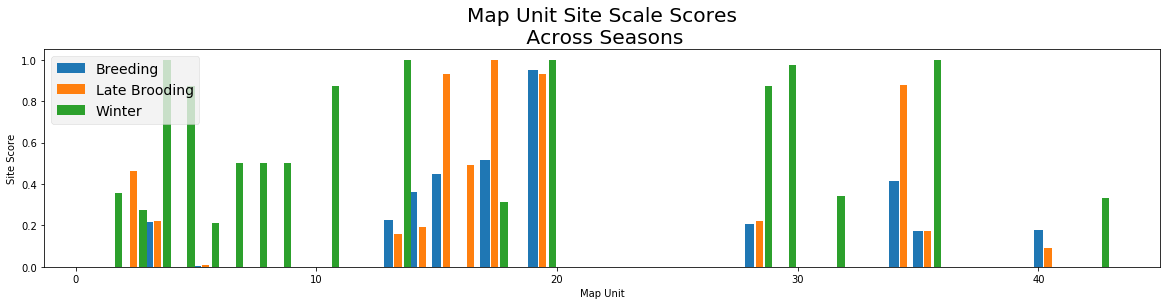

In [19]:
#What graphs do i want? 

#Map units

plt.figure(figsize=(20,4))
plt.bar(site_scale_score['map_unit_id'], height= site_scale_score['b_site_scale'], width = .4, label='Breeding')
#plt.bar(ind + width, site_scale_score['l_foraging'], width, label='Foraging')
plt.bar(site_scale_score['map_unit_id']+.4, height= site_scale_score['l_site_scale'], width = 0.3, label='Late Brooding')
plt.bar(site_scale_score['map_unit_id']+.8, height= site_scale_score['w_site_scale'], width = 0.3, label='Winter')
#plt.bar(ind + width, site_scale_score['l_foraging'], width, label='Foraging')
#plt.ylabel('Scores')
#plt.title('Scores by group and gender')
plt.style.use('fivethirtyeight')
plt.title('Map Unit Site Scale Scores\n Across Seasons')
plt.legend(loc='best')
plt.xlabel('Map Unit')
plt.ylabel('Site Score')
plt.show()


Text(0.5, 1.0, 'Late Brooding Foraging')

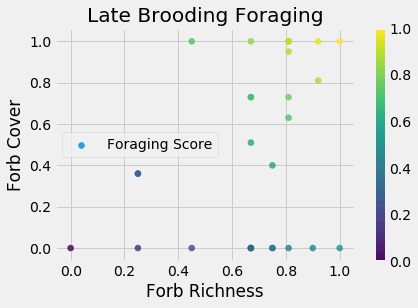

In [20]:
from matplotlib import style

plt.scatter(site_scale_score['l_forb_rich'], site_scale_score['l_forb_cover'], 
            c= site_scale_score['l_foraging'],
            alpha=0.8, 
            label= 'Foraging Score')
plt.style.use('fivethirtyeight')
plt.xlabel("Forb Richness")
plt.ylabel("Forb Cover")
plt.legend()
plt.colorbar()
plt.title('Late Brooding Foraging')

In [558]:
site_scale_score.columns

Index(['map_unit_id', 'b_trigger', 'b_sage_cover', 'b_shrub_cover', 'b_cover',
       'b_forb_cover', 'b_forb_rich', 'b_foraging', 'b_pre_mod',
       'b_brotec_cover', 'b_site_scale', 'b_local_scale', 'b_score',
       'b_facres', 'l_forb_cover', 'l_forb_rich', 'l_foraging',
       'l_grass_cover', 'l_cover', 'l_pre_mod', 'l_brotec_cover',
       'l_dist_sage', 'l_site_scale', 'l_local_scale', 'l_score', 'l_facres',
       'w_sage_height', 'w_sage_cover', 'w_site_scale', 'w_local_scale',
       'w_score', 'w_facres'],
      dtype='object')

In [601]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


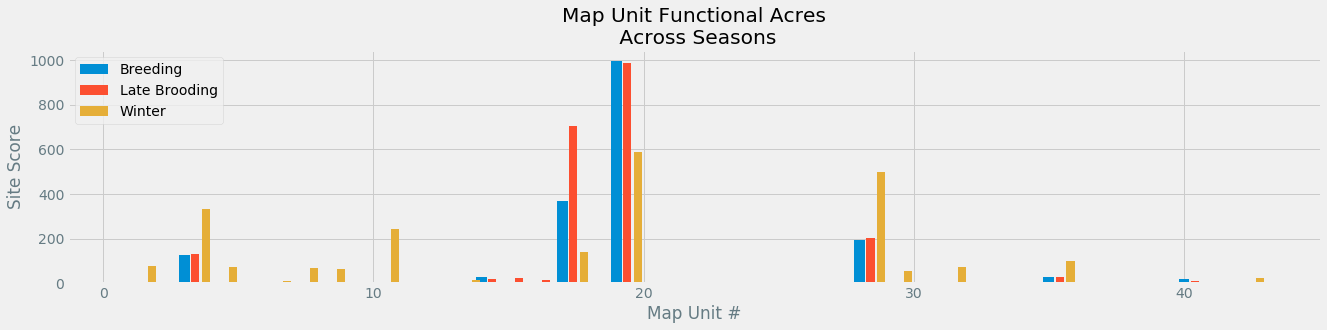

In [650]:
###bar chart!

plt.figure(figsize=(20,4))
plt.bar(site_scale_score['map_unit_id'], height= site_scale_score['b_facres'], width = .4, label='Breeding')
#plt.bar(ind + width, site_scale_score['l_foraging'], width, label='Foraging')
plt.bar(site_scale_score['map_unit_id']+.4, height= site_scale_score['l_facres'], width = 0.3, label='Late Brooding')
plt.bar(site_scale_score['map_unit_id']+.8, height= site_scale_score['w_facres'], width = 0.3, label='Winter')
#plt.bar(ind + width, site_scale_score['l_foraging'], width, label='Foraging')
#plt.ylabel('Scores')
#plt.title('Scores by group and gender')
plt.style.use('fivethirtyeight')
plt.title('Map Unit Functional Acres\n Across Seasons')
#plt.xticks(ind + width / 2, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.legend(loc='best')
plt.xlabel('Map Unit #')
plt.ylabel('Site Score')
plt.show()

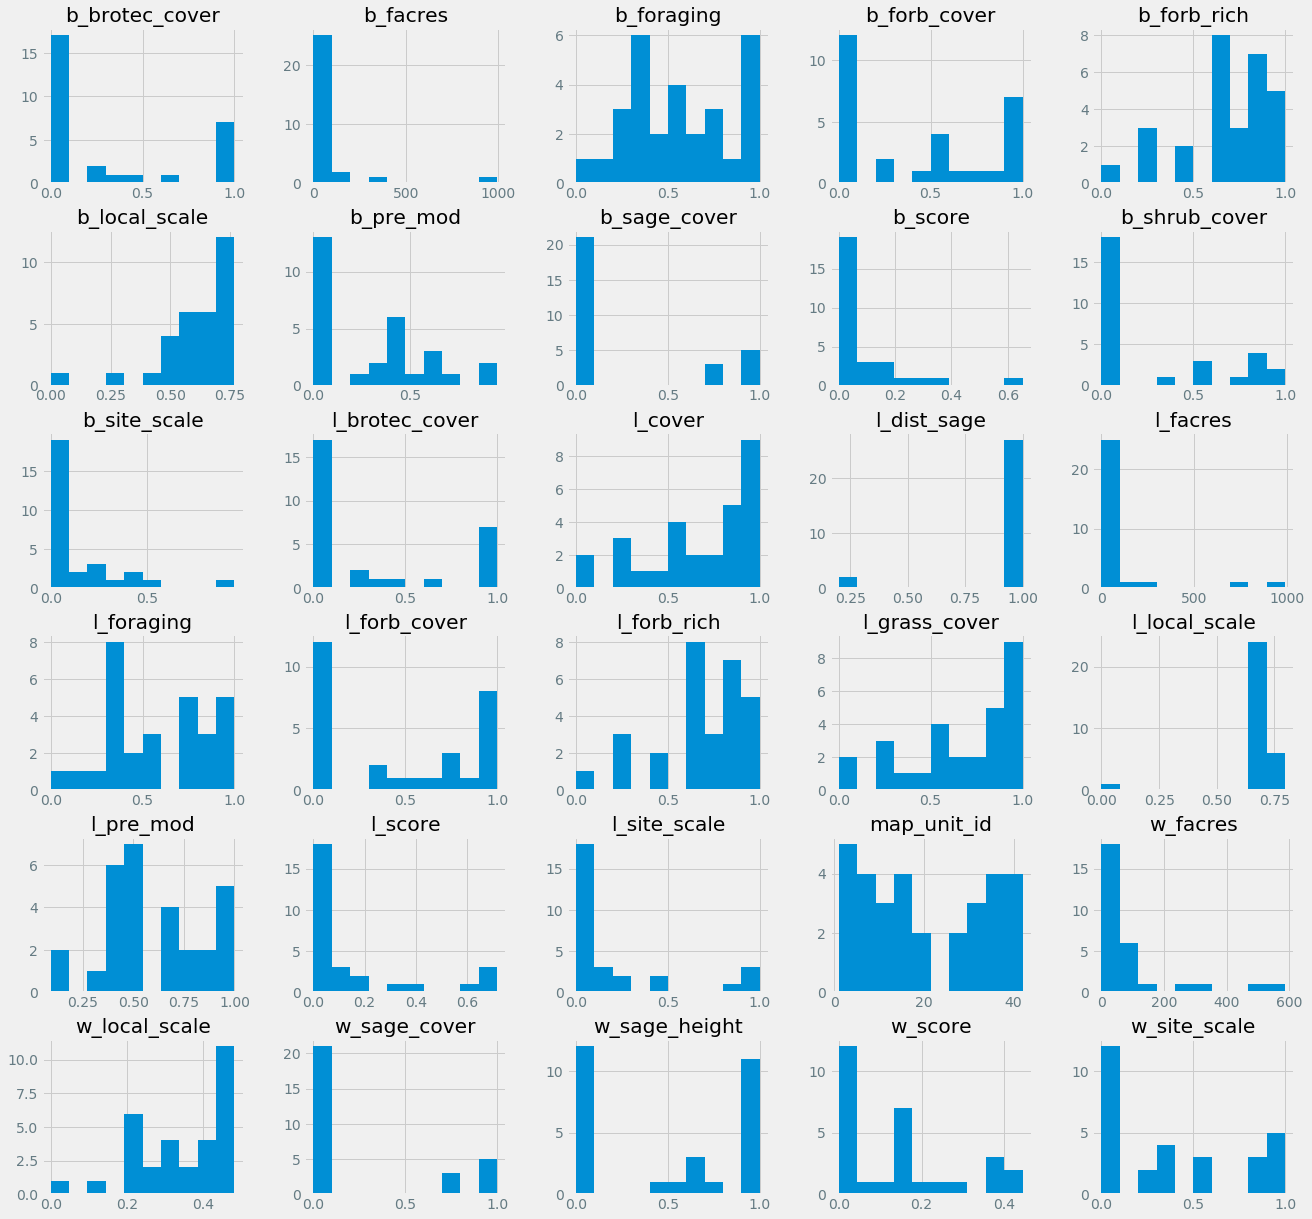

In [649]:
##histogram of all the variables
hist=site_scale_score.hist(bins = 10, figsize=(20,20))

In [19]:
##drop nas for box plot
b_forb_nan = site_scale_score['b_forb_rich'].dropna()

In [20]:
##what if we get rid of nas throughout? 
site_scale_score_nan = site_scale_score.dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x18e70652b70>,
 'caps': [<matplotlib.lines.Line2D at 0x18e706602b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e70652a20>],
 'medians': [<matplotlib.lines.Line2D at 0x18e70660940>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e70660c88>],
 'means': []}

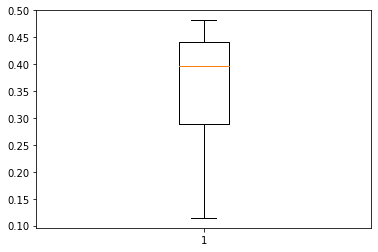

In [22]:
plt.boxplot(site_scale_score_nan['w_local_scale'])

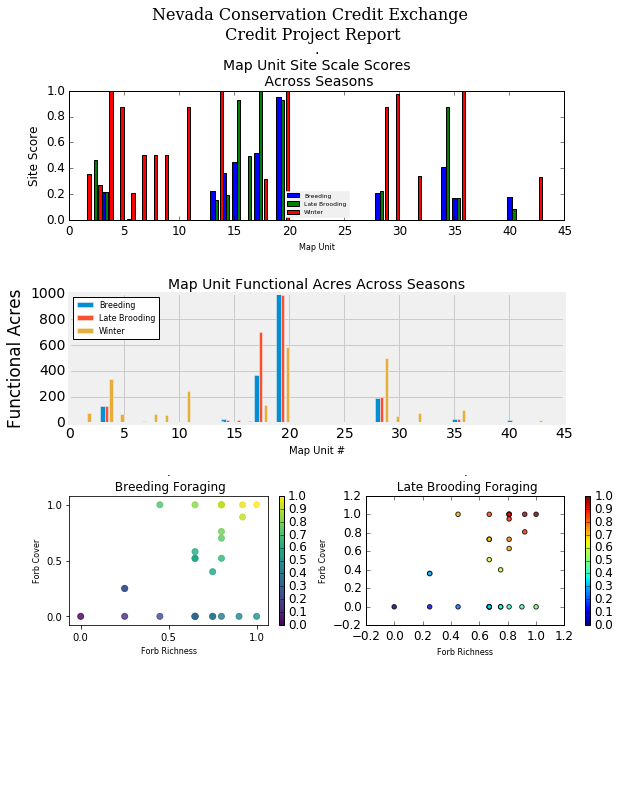

In [23]:
##develop page with multiple graphs


fig_a = plt.figure(constrained_layout=True, figsize=(8.5,11) )
spec4 = fig_a.add_gridspec(ncols=2, nrows=4, hspace=.5, wspace=0.1) #use gridspec to set frame
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
anno_opts = dict(xy=(0.5, 0.5), xycoords='axes fraction',
                 va='center', ha='center')
fig_a.text(0.5,1,'Nevada Conservation Credit Exchange\n Credit Project Report',
            ha='center',
            va='top',
            size=16,
            family= 'serif')

f1 = fig_a.add_subplot(spec4[2, 0])

plt.scatter(site_scale_score['b_forb_rich'], site_scale_score['b_forb_cover'], 
            c= site_scale_score['b_foraging'],
            alpha=0.8, 
            label= 'Foraging Score')
plt.style.use('classic')
plt.xlabel("Forb Richness", fontsize=8)
plt.ylabel("Forb Cover", fontsize=8)
plt.colorbar()
plt.title('.\n Breeding Foraging', fontsize=12)

fig2 = fig_a.add_subplot(spec4[2, 1])
plt.scatter(site_scale_score['l_forb_rich'], site_scale_score['l_forb_cover'], 
            c= site_scale_score['l_foraging'],
            alpha=0.8, 
            label= 'Foraging Score')
plt.style.use('classic')
plt.xlabel("Forb Richness", fontsize=8)
plt.ylabel("Forb Cover", fontsize=8)
plt.colorbar()
plt.title('.\n Late Brooding Foraging', fontsize=12)



fig3 = fig_a.add_subplot(spec4[0, :], frame_on=True)

plt.bar(site_scale_score['map_unit_id'], height= site_scale_score['b_site_scale'], width = .4, label='Breeding')
#plt.bar(ind + width, site_scale_score['l_foraging'], width, label='Foraging')
plt.bar(site_scale_score['map_unit_id']+.4, height= site_scale_score['l_site_scale'], width = 0.3, label='Late Brooding')
plt.bar(site_scale_score['map_unit_id']+.8, height= site_scale_score['w_site_scale'], width = 0.3, label='Winter')
#plt.bar(ind + width, site_scale_score['l_foraging'], width, label='Foraging')
#plt.ylabel('Scores')
#plt.title('Scores by group and gender')
plt.style.use('fivethirtyeight')
plt.title('\n .\n.\nMap Unit Site Scale Scores\n Across Seasons', fontsize=14)
plt.legend(loc='best', prop={'size': 6})
plt.xlabel('Map Unit', fontsize = 8)
plt.ylabel('Site Score')




fig_4 = fig_a.add_subplot(spec4[1, :])
plt.bar(site_scale_score['map_unit_id'], height= site_scale_score['b_facres'], width = .4, label='Breeding')
#plt.bar(ind + width, site_scale_score['l_foraging'], width, label='Foraging')
plt.bar(site_scale_score['map_unit_id']+.4, height= site_scale_score['l_facres'], width = 0.3, label='Late Brooding')
plt.bar(site_scale_score['map_unit_id']+.8, height= site_scale_score['w_facres'], width = 0.3, label='Winter')
#plt.bar(ind + width, site_scale_score['l_foraging'], width, label='Foraging')
#plt.ylabel('Scores')
#plt.title('Scores by group and gender')
plt.style.use('classic')
plt.title('\nMap Unit Functional Acres Across Seasons',fontsize=14)
plt.legend(loc='best', prop={'size': 8})
plt.xlabel('Map Unit #', fontsize=10)
plt.ylabel('Functional Acres')
plt.show()

pag2 = fig_a.savefig("..\outputs\output_graphs.pdf", dpi=None, facecolor='w', edgecolor='k',
        orientation='portrait', papertype='letter', format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)

now, let's do the table
fun table formatting!

In [25]:
tab=site_scale_score.round(3)

In [26]:
tab.columns

Index(['map_unit_id', 'b_trigger', 'b_sage_cover', 'b_shrub_cover', 'b_cover',
       'b_forb_cover', 'b_forb_rich', 'b_foraging', 'b_pre_mod',
       'b_brotec_cover', 'b_site_scale', 'b_local_scale', 'b_score',
       'b_facres', 'l_forb_cover', 'l_forb_rich', 'l_foraging',
       'l_grass_cover', 'l_cover', 'l_pre_mod', 'l_brotec_cover',
       'l_dist_sage', 'l_site_scale', 'l_local_scale', 'l_score', 'l_facres',
       'w_sage_height', 'w_sage_cover', 'w_site_scale', 'w_local_scale',
       'w_score', 'w_facres'],
      dtype='object')

In [27]:
##choose what columns to display
##this will have to be variable right? or will column names be standardized

tab = tab[['map_unit_id', 'b_cover', 'b_foraging','b_brotec_cover', 'b_site_scale', 'b_local_scale', 'b_score']]
tab.drop(tab.tail(1).index,inplace=True)

In [28]:
tab.columns ##check 

Index(['map_unit_id', 'b_cover', 'b_foraging', 'b_brotec_cover',
       'b_site_scale', 'b_local_scale', 'b_score'],
      dtype='object')

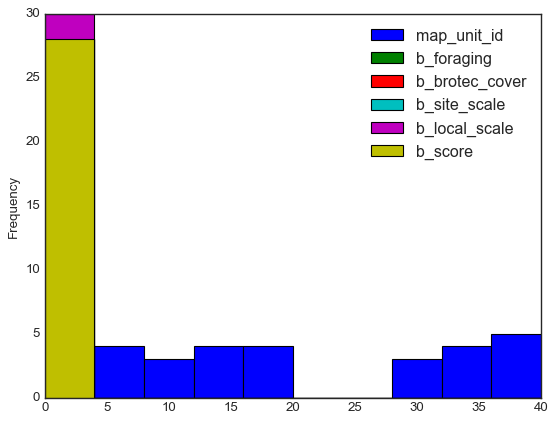

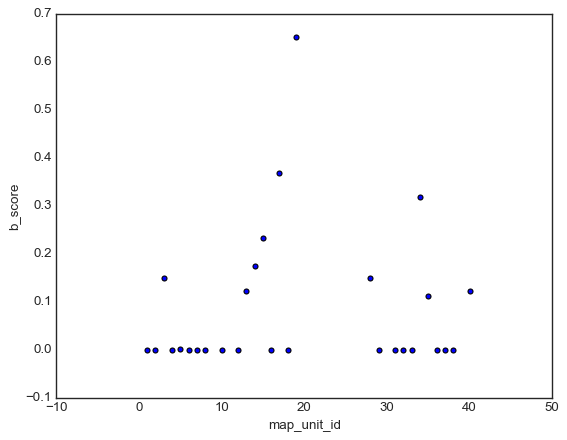

In [29]:
##quick review of what we got!

tab.plot.hist()
tab.plot.scatter(x= 'map_unit_id', y = 'b_score')

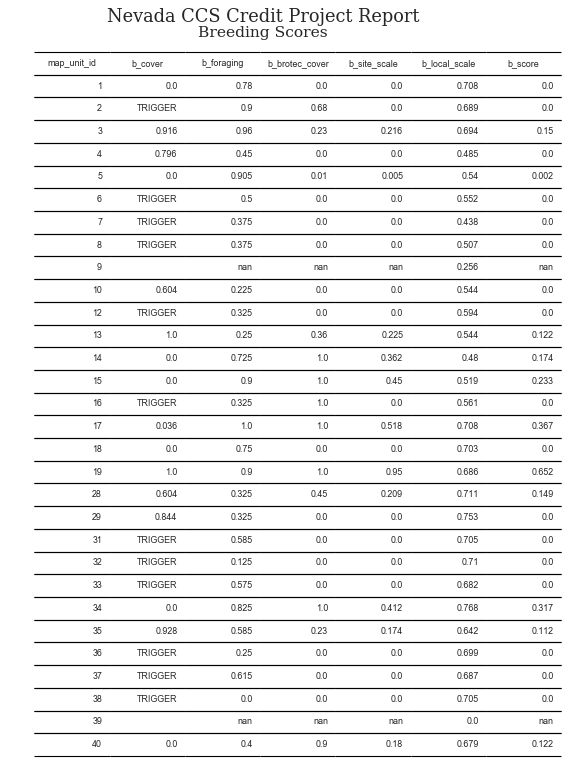

In [30]:
##create table of breeding scores


fig_tab = plt.figure(figsize = (8.5, 11))
plt.style.use('seaborn-white')


ax = plt.subplot(frame_on=False)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.table(cellText=tab.values, 
         colLabels= tab.columns,
         loc= 'bottom', 
         edges = 'horizontal',
         bbox = [0.05, 0, 1, 1])
fig_tab.text(0.5,.95,'Nevada CCS Credit Project Report',
            ha='center',
            va='top',
            size=16,
            family= 'serif')
fig_tab.text(0.5,.93,'Breeding Scores',
            ha='center',
            va='top',
            size=14,
            family= 'serif')
#fig_tab[(1, 0)].set_facecolor("#56b5fd")
fig_tab.show

page3 = fig_tab.savefig("..\outputs\output_table.pdf", orientation='portrait', papertype='letter', format='pdf',
        transparent=False)
#[horizontal position, vertical position, width, height ]

In [83]:
#merge pdfs
##arcpy needed for this
#pag1.appendPages(page2)
#pag1.appendPages(page3)

AttributeError: 'NoneType' object has no attribute 'appendPages'